Несколько фактов о PyTorch:
- динамический граф вычислений
- удобные модули `torch.nn` и `torchvision` для быстрого прототипирования нейронных сетей
- даже быстрее, чем TensorFlow на некоторых задачах
- позволяет легко использовать **GPU**

По своей сути PyTorch предоставляет две основные функции:

- n-мерный тензор, похожий на **numpy**, но может работать на графических процессорах
- Автоматическая дифференциация для построения и обучения нейронных сетей

Если бы PyTorch был формулой, она была бы такой:

$$PyTorch = NumPy + CUDA + Autograd$$

In [1]:
# Стандартный способ импорта
import torch
import torch.nn as nn

Давайте посмотрим, как мы можем использовать PyTorch для работы с векторами и тензорами.

Напомним, что **тензор** - это многомерный вектор, например :

`x = np.array ([1,2,3])` - вектор = тензор с 1 размерностью (точнее: `(3,)`)

`y = np.array ([[1, 2, 3], [4, 5, 6]])` - матрица = тензор с двумя измерениями (`(2, 3)` в данном случае)

`z = np.array ([[[1, 2, 3], [4, 5, 6], [7, 8, 9]]],
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]]]) `-" куб "(3, 3, 3) = тензор с тремя измерениями (` ( 3, 3, 3) `в этом случае)


Одним из реальных примеров трехмерного тензора является **изображение**, оно имеет 3 измерения: `высота`, `ширина` и `глубина канала` (глубина канала = 3 для цветных изображений, 1 для оттенков серого). Вы можете думать об этом как о параллелепипеде, состоящем из действительных чисел.


### Типы Тензоров

В PyTorch мы будем использовать `torch.Tensor` (`FloatTensor`, `IntTensor`, `ByteTensor`) для всех вычислений.

Все типы:

In [3]:
torch.HalfTensor      # 16 бит, floating point
torch.FloatTensor     # 32 бита, floating point
torch.DoubleTensor    # 64 бита, floating point

torch.ShortTensor     # 16 бит, integer, signed
torch.IntTensor       # 32 бита, integer, signed
torch.LongTensor      # 64 бита, integer, signed

torch.CharTensor      # 8 бит, integer, signed
torch.ByteTensor      # 8 бит, integer, unsigned

torch.ByteTensor

Мы будем использовать в основном `torch.FloatTensor()` и `torch.IntTensor()`.

### Создание тензора

In [2]:
a = torch.FloatTensor([1, 2])
a


tensor([1., 2.])

In [4]:
a.shape

torch.Size([2])

In [8]:
b = torch.FloatTensor([[1,2,3], [4,5,6]])
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [9]:
b.shape

torch.Size([2, 3])

In [10]:
x = torch.FloatTensor(2,3,4)

In [11]:
x

tensor([[[ 0.0000e+00,  0.0000e+00,  8.2044e-28,  0.0000e+00],
         [ 7.1454e-27,  0.0000e+00, -5.1737e-07,  4.5684e-41],
         [ 1.4013e-45,  0.0000e+00,  8.4078e-45,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 1.4013e-45,  0.0000e+00,  0.0000e+00,  0.0000e+00]]])

In [12]:
x = torch.FloatTensor(100)
x

tensor([ 5.4505e-26,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.5614e-39,
         1.5618e-39,  0.0000e+00,  1.5635e-39,  0.0000e+00,  6.1342e+07,
         2.3822e-44,  0.0000e+00,  0.0000e+00,  0.0000e+00,  3.1641e-15,
         1.5613e-39,  3.8899e-27,  3.4060e-09,  2.3822e-44,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  1.2723e-26,  1.5618e-39,  0.0000e+00,
         2.0364e-25, -4.2726e-03,  1.5754e-39,  0.0000e+00,  2.3962e+05,
         2.3822e-44,  0.0000e+00,  0.0000e+00,  0.0000e+00,  3.3862e-15,
         2.3822e-44,  0.0000e+00,  1.5865e-39,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  1.5614e-39,  0.0000e+00,  1.5618e-39,
         0.0000e+00,  3.2583e-24,  3.8340e+06,  2.3822e-44,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  4.5970e-17,  1.4242e-38,  9.2362e-37,
         1.5660e-39,  1.9343e-16,  2.3822e-44,  0.0000e+00,  4.7790e-38,
         3.1061e-30,  1.5775e-39,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  6.2839e-38,  2.3822e-44,  9.1

In [13]:
x = torch.IntTensor(45, 57, 14, 2)
x.shape

torch.Size([45, 57, 14, 2])

**Примечание:** если вы создаете `torch.Tensor` с помощью следующего конструктора, он будет заполнен мусором из "случайных номеров":

In [14]:
x = torch.IntTensor(3, 2, 4)
x

tensor([[[354528459,         0,         0,         0],
         [    65793,  16842752,  16843008,     65792]],

        [[ 16842752,       256,     65536,  16842753],
         [        1,  16843009,  16777473,       257]],

        [[ 16842752,  16843009,  16777473,  16777473],
         [    65792,  16843009,       256,     65536]]], dtype=torch.int32)

### Инициализации тензоров

In [15]:
x1 = torch.FloatTensor(3, 2, 4)
x1.zero_()
x2 = torch.zeros(3, 2, 4)
x3 = torch.zeros_like(x1)

assert torch.allclose(x1, x2) and torch.allclose(x1, x3)

Инициализация случайного распределения

In [16]:
x = torch.randn((2,3))                # Normal(0, 1) с размером (2, 3)
x

tensor([[ 0.5305, -0.5550, -0.2309],
        [ 1.0010,  0.6589,  2.2735]])

In [17]:
print(x.random_(0, 10))                    # Дискретное равномерное U[0, 10]
print(x.uniform_(0, 1))                     # Равномерно U[0, 1]
print(x.normal_(mean=0, std=1))             # Нормальное со средним 0 и дисперсией 1
print(x.bernoulli_(p=0.5))                  # bernoulli with parameter p

tensor([[0., 8., 9.],
        [8., 8., 0.]])
tensor([[0.2605, 0.7559, 0.0135],
        [0.0334, 0.1217, 0.7427]])
tensor([[ 1.2228, -0.3385,  1.2867],
        [ 1.3202,  0.3317,  2.8700]])
tensor([[0., 0., 0.],
        [1., 0., 0.]])


## Функции в Torch

У всех функций Numpy есть своя пара в Torch!

### Изменение формы
`np.reshape()` == `torch.view()`:

In [18]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [19]:
b.view(3, 2).shape

torch.Size([3, 2])

In [20]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
b, b.stride()

(tensor([[1., 2., 3.],
         [4., 5., 6.]]),
 (3, 1))

In [21]:
b.view(3, 2), b.view(3, 2).stride()

(tensor([[1., 2.],
         [3., 4.],
         [5., 6.]]),
 (2, 1))

**Примечание:** `torch.view ()` создает новый тензор, но старый остается неизменным

In [23]:
b.view(-1, 2)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [23]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

contiguous - свойство `torch.Tensor`, указывающее, соответствует ли текущее представление тензора тому, как его данные записаны в памяти

In [24]:
b.T.stride(), b.is_contiguous(), b.T.is_contiguous()

((1, 3), True, False)

### Изменение типа тензора

In [5]:
a = torch.FloatTensor([1.5, 3.2, -7])

In [6]:
a.type_as(torch.IntTensor())

tensor([ 1,  3, -7], dtype=torch.int32)

In [7]:
a.to(torch.int32)

tensor([ 1,  3, -7], dtype=torch.int32)

In [8]:
a.type_as(torch.ByteTensor())

tensor([  1,   3, 249], dtype=torch.uint8)

**Note:** `.type_as()` создаёт новый тензор, не меняя старый

In [10]:
a

tensor([ 1.5000,  3.2000, -7.0000])

Индексирование - ровно как в `NumPy`:

In [34]:
a = torch.FloatTensor([[100, 20, 35], [15, 163, 534], [52, 90, 66]])
a

tensor([[100.,  20.,  35.],
        [ 15., 163., 534.],
        [ 52.,  90.,  66.]])

In [34]:
a[0, 0]

tensor(100.)

In [35]:
a[0:2, 1]

tensor([ 20., 163.])

### Арифметические операции

| операция | аналоги |
|:-:|:-:|
|`+`| `torch.add()` |
|`-`| `torch.sub()` |
|`*`| `torch.mul()` |
|`/`| `torch.div()` |

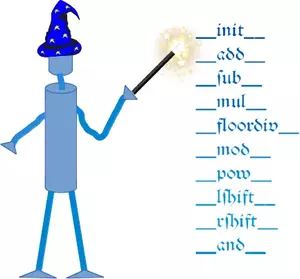

*Помним, что эти и многие другие полезные операции определяются в Python с помощью magic-методов*

#### Сложение

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [37]:
a + b

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [39]:
a.add(b)

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [39]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [40]:
a + b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

#### Вычитание

In [42]:
a - b

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

In [42]:
a.sub(b) # copy

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

In [43]:
a.sub_(b) # inplace

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

#### Умножение (поэлементное)

In [ ]:
a * b

tensor([[-2.0000e+00, -8.0000e+00, -1.8000e+01],
        [-2.0000e+02, -8.0000e+02, -1.8000e+03],
        [-2.0000e+04, -8.0000e+04, -1.8000e+05]])

In [45]:
a.mul(b)

tensor([[-2.0000e+00, -8.0000e+00, -1.8000e+01],
        [-2.0000e+02, -8.0000e+02, -1.8000e+03],
        [-2.0000e+04, -8.0000e+04, -1.8000e+05]])

#### Деление (поэлементное):

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [47]:
a / b

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

In [48]:
a.div(b)

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

**Примечание:** все эти операции создают новые тензоры, старые тензоры остаются неизменными.

In [ ]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [50]:
b

tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]])

### Операторы сравнения

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [52]:
a == b

tensor([[False, False, False],
        [False, False, False],
        [ True,  True,  True]])

In [53]:
a != b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

In [54]:
a < b

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

In [55]:
a > b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

### Использование индексации по логической маске

In [57]:
a[a > b]

tensor([ 1.,  2.,  3., 10., 20., 30.])

In [58]:
b[a == b]

tensor([100., 200., 300.])

### Поэлементное применение **универсальных функций**

In [59]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])

In [60]:
a.sin()

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [61]:
torch.sin(a)

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [62]:
a.tan()

tensor([[ 1.5574, -2.1850, -0.1425],
        [ 0.6484,  2.2372, -6.4053],
        [-0.5872, -1.7925, 45.2447]])

In [63]:
a.exp()

tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01],
        [2.2026e+04, 4.8517e+08, 1.0686e+13],
        [       inf,        inf,        inf]])

In [64]:
a.log()

tensor([[0.0000, 0.6931, 1.0986],
        [2.3026, 2.9957, 3.4012],
        [4.6052, 5.2983, 5.7038]])

In [65]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [66]:
b.abs()

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

### Агрегация и работа с осями
#### sum, mean, max, min:

In [67]:
a.sum(dim=1)

tensor([  6.,  60., 600.])

In [68]:
a.mean()

tensor(74.)

#### Применение функции вдоль оси

In [69]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [70]:
a.sum(dim=0)

tensor([111., 222., 333.])

In [71]:
a.sum(dim=1)

tensor([  6.,  60., 600.])

In [72]:
a.max()

tensor(300.)

In [73]:
a.max(0)

torch.return_types.max(
values=tensor([100., 200., 300.]),
indices=tensor([2, 2, 2]))

**Примечание:** второй тензор, возвращаемый `.max()`, содержит индексы элементов max вдоль этой оси. Например. в этом случае `a.max ()` вернула `(100, 200, 300)`, которые являются минимальными элементами по оси 0 (вдоль столбцов), а их индексы по оси 0 равны `(2, 2, 2)`.


#### Фиктивные оси

Иногда очень сложно бывает разобраться, как правильно выбрать оси для применения операций с многомерными массивами. Поэтому сейчас мы решим на эту тему пару задач.
Сначала посмотрим, как создавать у массивов новые фиктивные оси, это нам пригодится.

In [74]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])

a[:, None, :].shape

torch.Size([3, 1, 3])

In [75]:
a[:, :, None]

tensor([[[  1.],
         [  2.],
         [  3.]],

        [[ 10.],
         [ 20.],
         [ 30.]],

        [[100.],
         [200.],
         [300.]]])

#### Задача на нормализацию изображения
Реализуйте функцию ``normalize_pictures(A)``, которая принимает на вход четырёхмерный тензор --- батч из ``batch_size`` изображений, каждое из которых является трехмерным тензором формы (num_channels, width, height). Нужно стандартизировать изображение по каждому каналу, то есть сделать так, чтобы среднее значение яркости каждого канала (по всем изображениям и всем пикселям) было равно 0, а стандартное отклонение --- 1.

In [77]:
def normalize_pictures(A):
    """
    param A: torch.Tensor[batch_size, num_channels, width, height]
    """

    # YOUR CODE

    return result

In [78]:
batch = torch.randint(0, 156, (64, 3, 300, 300), dtype=torch.float32)
batch.mean(dim=(2,3)).shape

torch.Size([64, 3])

In [114]:
batch = torch.randint(0, 256, (64, 3, 300, 300), dtype=torch.float32)

B = normalize_pictures(batch)

print(B.mean(dim=(2,3)).shape)
print(B.std(dim=(2,3)))

torch.Size([64, 3])
tensor([[1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0

## Матричные операции

#### Транспонирование тензора

In [80]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [81]:
a.t()

tensor([[  1.,  10., 100.],
        [  2.,  20., 200.],
        [  3.,  30., 300.]])

Это тоже не inplace-операция:

In [82]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

#### Скалярное произведение векторов

In [83]:
a = torch.FloatTensor([1, 2, 3, 4, 5, 6])
b = torch.FloatTensor([-1, -2, -4, -6, -8, -10])

In [84]:
a.dot(b)

tensor(-141.)

In [85]:
a.shape, b.shape

(torch.Size([6]), torch.Size([6]))

In [86]:
a @ b

tensor(-141.)

In [87]:
type(a)

torch.Tensor

In [88]:
type(b)

torch.Tensor

In [89]:
type(a @ b)

torch.Tensor

#### Матричное произведение

In [90]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [91]:
a.mm(b)

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

In [92]:
a @ b

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

In [93]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1], [-10], [100]])

In [94]:
print(a.shape, b.shape)

torch.Size([3, 3]) torch.Size([3, 1])


In [95]:
a @ b

tensor([[  279.],
        [ 2790.],
        [27900.]])

Тензор `b` можно развернуть в одномерный массив с помощью функции `torch.view(-1)`, чтобы результат был вектором

In [96]:
b

tensor([[ -1.],
        [-10.],
        [100.]])

In [97]:
b.view(-1)

tensor([ -1., -10., 100.])

In [98]:
a @ b.view(-1)

tensor([  279.,  2790., 27900.])

In [99]:
a.mv(b.view(-1))

tensor([  279.,  2790., 27900.])

In [100]:
y = torch.Tensor(2, 3, 4, 5)
z = torch.Tensor(2, 3, 5, 6)
(y @ z).shape

torch.Size([2, 3, 4, 6])

## Конвертация
#### Конвертация из Numpy в Pytorch:

In [11]:
import numpy as np

a = np.random.rand(3, 3)
a

array([[0.22110751, 0.24552549, 0.72932063],
       [0.0437173 , 0.21832865, 0.329616  ],
       [0.6622238 , 0.43842032, 0.79655222]])

In [12]:
b = torch.from_numpy(a)
b

tensor([[0.2211, 0.2455, 0.7293],
        [0.0437, 0.2183, 0.3296],
        [0.6622, 0.4384, 0.7966]], dtype=torch.float64)

**Внимание!** `a` и `b` хранятся в одной и той же ячейке данных. Если именить один тензор, то изменится и другой.

In [13]:
b -= b
b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [14]:
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### Конвертация из Torch в Numpy

In [15]:
a = torch.FloatTensor(2, 3, 4)
a

tensor([[[2.2273e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 1.0524e+21, 2.0797e+20]],

        [[1.0617e+21, 3.3210e-09, 1.7394e-04, 4.2247e-05],
         [1.7394e-04, 1.6766e+22, 1.6853e+22, 1.3178e-08],
         [2.6730e-06, 5.2943e-08, 1.3224e+22, 5.3695e-05]]])

In [16]:
type(a)

torch.Tensor

In [17]:
x = a.numpy()
x

array([[[2.22726321e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.05242276e+21, 2.07968948e+20]],

       [[1.06168259e+21, 3.32103256e-09, 1.73935288e-04, 4.22468329e-05],
        [1.73942040e-04, 1.67656066e+22, 1.68528875e+22, 1.31779831e-08],
        [2.67296650e-06, 5.29427844e-08, 1.32235480e+22, 5.36948246e-05]]],
      dtype=float32)

In [18]:
x.shape

(2, 3, 4)

In [19]:
type(x)

numpy.ndarray

In [20]:
x -= x

In [21]:
a

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

#### Задание. Реализация функции forward
Реализуйте функцию `forward_pass(X, w)` для одного нейрона нейронной сети с активацией ``sigmoid``. Используйте библиотеку PyTorch

<img src='https://radioprog.ru/uploads/media/articles/0001/05/267ad35a9e64a7b92c2e3b94940f686816ea6bf8.jpeg'>

In [ ]:
def forward_pass(X, w):

  # YOUR CODE

  return result



In [113]:
X = torch.FloatTensor([[-5, 5], [2, 3], [1, -1]])
print(X.shape)
w = torch.FloatTensor([[-0.5], [2.5]])
print(w.shape)
result = forward_pass(X, w)
print('result: {}'.format(result))

torch.Size([3, 2])
torch.Size([2, 1])
result: tensor([[1.0000],
        [0.9985],
        [0.0474]])
